加载数据...



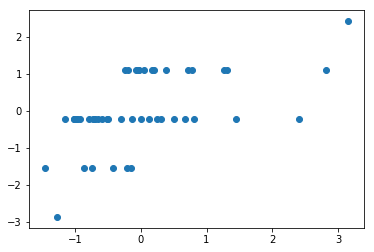


执行梯度下降算法....

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

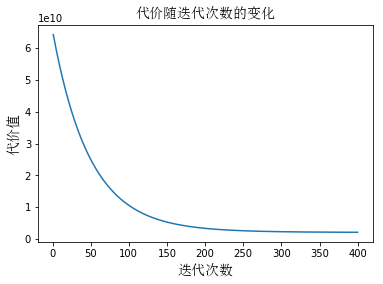

In [2]:
#-*- coding: utf-8 -*-
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题

def linearRegression(alpha=0.01,num_iters=400):
    print(u"加载数据...\n")
    
    data = loadtxtAndcsv_data("data.txt",",",np.float64)  #读取数据
    X = data[:,0:-1]      # X对应0到倒数第2列                  
    y = data[:,-1]        # y对应最后一列  
    m = len(y)            # 总的数据条数
    col = data.shape[1]      # data的列数
    
    X,mu,sigma = featureNormaliza(X)    # 归一化
    plot_X1_X2(X)         # 画图看一下归一化效果
    
    X = np.hstack((np.ones((m,1)),X))    # 在X前加一列1
    
    print(u"\n执行梯度下降算法....\n")
    
    theta = np.zeros((col,1))
    y = y.reshape(-1,1)   #将行向量转化为列
    theta,J_history = gradientDescent(X, y, theta, alpha, num_iters)
    
    plotJ(J_history, num_iters)
    
    return mu,sigma,theta   #返回均值mu,标准差sigma,和学习的结果theta
    
   
# 加载txt和csv文件
def loadtxtAndcsv_data(fileName,split,dataType):
    return np.loadtxt(fileName,delimiter=split,dtype=dataType)

# 加载npy文件
def loadnpy_data(fileName):
    return np.load(fileName)

# 归一化feature
def featureNormaliza(X):
    X_norm = np.array(X)            #将X转化为numpy数组对象，才可以进行矩阵的运算
    #定义所需变量
    mu = np.zeros((1,X.shape[1]))   
    sigma = np.zeros((1,X.shape[1]))
    
    mu = np.mean(X_norm,0)          # 求每一列的平均值（0指定为列，1代表行）
    sigma = np.std(X_norm,0)        # 求每一列的标准差
    for i in range(X.shape[1]):     # 遍历列
        X_norm[:,i] = (X_norm[:,i]-mu[i])/sigma[i]  # 归一化
    
    return X_norm,mu,sigma

# 画二维图
def plot_X1_X2(X):
    plt.scatter(X[:,0],X[:,1])
    plt.show()


# 梯度下降算法
def gradientDescent(X,y,theta,alpha,num_iters):
    m = len(y)      
    n = len(theta)
    
    temp = np.matrix(np.zeros((n,num_iters)))   # 暂存每次迭代计算的theta，转化为矩阵形式
    
    
    J_history = np.zeros((num_iters,1)) #记录每次迭代计算的代价值
    
    for i in range(num_iters):  # 遍历迭代次数    
        h = np.dot(X,theta)     # 计算内积，matrix可以直接乘
        temp[:,i] = theta - ((alpha/m)*(np.dot(np.transpose(X),h-y)))   #梯度的计算
        theta = temp[:,i]
        J_history[i] = computerCost(X,y,theta)      #调用计算代价函数
        print('.', end=' ')      
    return theta,J_history  

# 计算代价函数
def computerCost(X,y,theta):
    m = len(y)
    J = 0
    
    J = (np.transpose(X*theta-y))*(X*theta-y)/(2*m) #计算代价J
    return J

# 画每次迭代代价的变化图
def plotJ(J_history,num_iters):
    x = np.arange(1,num_iters+1)
    plt.plot(x,J_history)
    plt.xlabel(u"迭代次数",fontproperties=font) # 注意指定字体，要不然出现乱码问题
    plt.ylabel(u"代价值",fontproperties=font)
    plt.title(u"代价随迭代次数的变化",fontproperties=font)
    plt.show()

# 测试linearRegression函数
def testLinearRegression():
    mu,sigma,theta = linearRegression(0.01,400)
    #print u"\n计算的theta值为：\n",theta
    #print u"\n预测结果为：%f"%predict(mu, sigma, theta)
    
# 测试学习效果（预测）
def predict(mu,sigma,theta):
    result = 0
    # 注意归一化
    predict = np.array([1650,3])
    norm_predict = (predict-mu)/sigma
    final_predict = np.hstack((np.ones((1)),norm_predict))
    
    result = np.dot(final_predict,theta)    # 预测结果
    return result
    
    
if __name__ == "__main__":
    testLinearRegression()

In [25]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    # 解决windows环境下画图汉字乱码问题

In [26]:
    data = loadtxtAndcsv_data("data.txt", ",", np.float64) 
    X = data[:,0:-1]
    y = data[:,-1]

In [27]:
data = loadtxtAndcsv_data("data.txt", ",", np.float64) 

In [28]:
print (data)

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

In [29]:
type(data)

numpy.ndarray

In [30]:
X = data[:,0:-1]
y = data[:,-1]


In [31]:
print (y)

[399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.
 242500. 239999. 347000. 329999. 699900. 259900. 449900. 299900. 199900.
 499998. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]


In [32]:
type(y)

numpy.ndarray

In [33]:
plot_data(X,y) 

NameError: name 'plot_data' is not defined

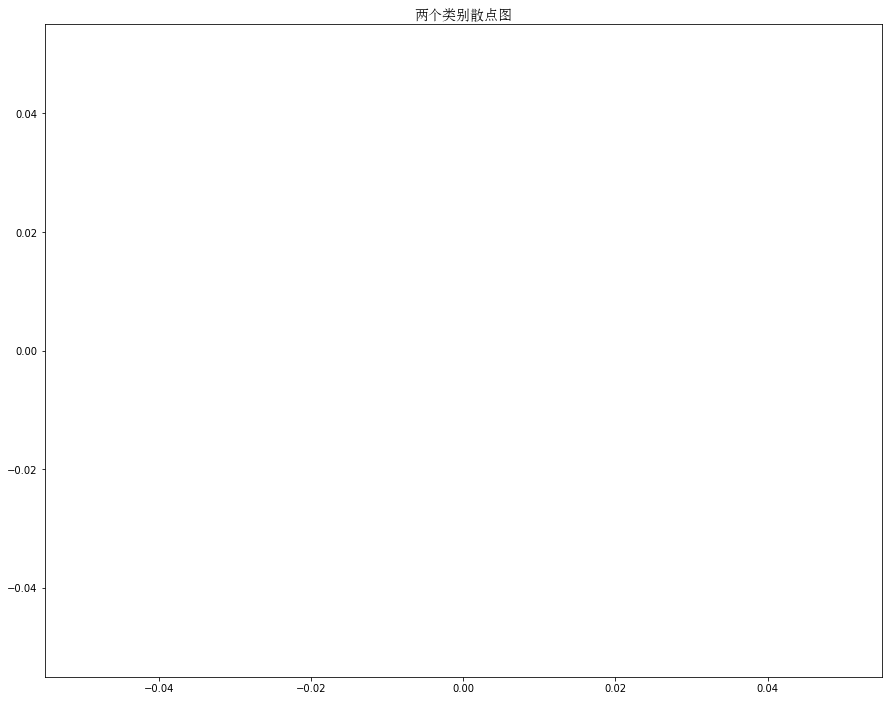

In [34]:
    pos = np.where(y==1)    #找到y==1的坐标位置
    neg = np.where(y==0)    #找到y==0的坐标位置
    #作图
    plt.figure(figsize=(15,12))
    plt.plot(X[pos,0],X[pos,1],'ro')        # red o
    plt.plot(X[neg,0],X[neg,1],'bo')        # blue o
    plt.title(u"两个类别散点图",fontproperties=font)
    plt.show()

In [35]:
print (X[0])

[2104.    3.]


In [36]:
print (X)

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]
 [1.940e+03 4.000e+00]
 [2.000e+03 3.000e+00]
 [1.890e+03 3.000e+00]
 [4.478e+03 5.000e+00]
 [1.268e+03 3.000e+00]
 [2.300e+03 4.000e+00]
 [1.320e+03 2.000e+00]
 [1.236e+03 3.000e+00]
 [2.609e+03 4.000e+00]
 [3.031e+03 4.000e+00]
 [1.767e+03 3.000e+00]
 [1.888e+03 2.000e+00]
 [1.604e+03 3.000e+00]
 [1.962e+03 4.000e+00]
 [3.890e+03 3.000e+00]
 [1.100e+03 3.000e+00]
 [1.458e+03 3.000e+00]
 [2.526e+03 3.000e+00]
 [2.200e+03 3.000e+00]
 [2.637e+03 3.000e+00]
 [1.839e+03 2.000e+00]
 [1.000e+03 1.000e+00]
 [2.040e+03 4.000e+00]
 [3.137e+03 3.000e+00]
 [1.811e+03 4.000e+00]
 [1.437e+03 3.000e+00]
 [1.239e+03 3.000e+00]
 [2.132e+03 4.000e+00]
 [4.215e+03 4.000e+00]
 [2.162e+03 4.000e+00]
 [1.664e+03 2.000e+00]
 [2.238e+03 3.000e+00]
 [2.567e+03 4.000e+00]
 [1.200e+03

In [37]:
print (X[0][0])

2104.0


In [38]:
import numpy as np 
a = np.array([1,2,3])  
print (a)

[1 2 3]


In [39]:
import numpy as np 
a = np.array([[1,  2],  [3,  4]])  
print (a)

[[1 2]
 [3 4]]


In [40]:
print (a[0])

[1 2]


In [41]:
import numpy as np 
a = np.array([[[1,  2],  [3,  4]],[[5,  6],  [7,  8]]])  
print (a)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [42]:
print (a[0])

[[1 2]
 [3 4]]


In [43]:
# 首先创建结构化数据类型
import numpy as np
dt = np.dtype([('age',np.int8)]) 
print(dt)

[('age', 'i1')]
